In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import fipy
from fipy import Grid1D, CellVariable
from fipy import TransientTerm, DiffusionTerm

In [3]:
# define parameters
## physics
L = 1.0
Uinit = 0.0
U_H = 1.0
U_L = 0.0
alpha = 1.0
## FVM
N = 500
dt = 0.00001
Nt = 100

In [4]:
# define mesh
w = L/N
msh = Grid1D(dx=w, nx=N)

In [5]:
xcc = msh.cellCenters.value[0]

In [6]:
# define cell variable

In [7]:
u = CellVariable(mesh=msh, value=Uinit)

In [8]:
uval = u.value

In [9]:
# define BC
# Dirichlet-style
u.constrain(value = U_H, where = msh.facesLeft)
u.constrain(value = U_L, where = msh.facesRight)

In [10]:
# define IC
uval[xcc < L/2] = U_H
uval[xcc >= L/2] = U_L

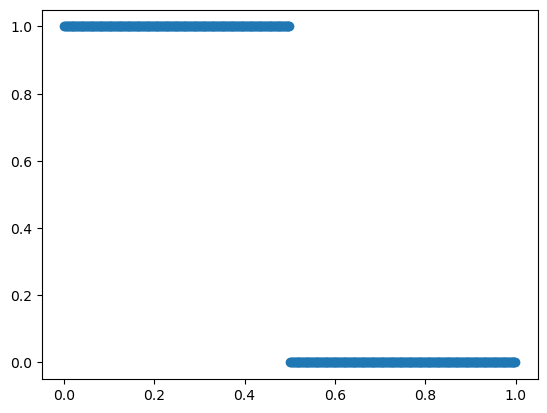

In [11]:
plt.plot(xcc, uval, 'o')

In [12]:
np.sum(uval * w)

0.5000000000000002

In [13]:
# define PDE
eqn   = TransientTerm(var=u) == DiffusionTerm(var=u, coeff=alpha)

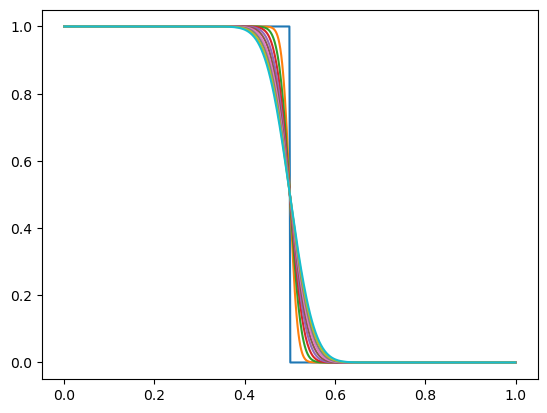

In [14]:
# solve equation and sample
u0 = np.zeros(Nt)
tt = np.arange(Nt) * dt
for n in range(Nt):
    u0[n] = uval[0]
    if n%10==0:
        plt.plot(xcc, uval)
    eqn.solve(dt=dt)

In [15]:
np.sum(uval * w)

0.4999999999999834

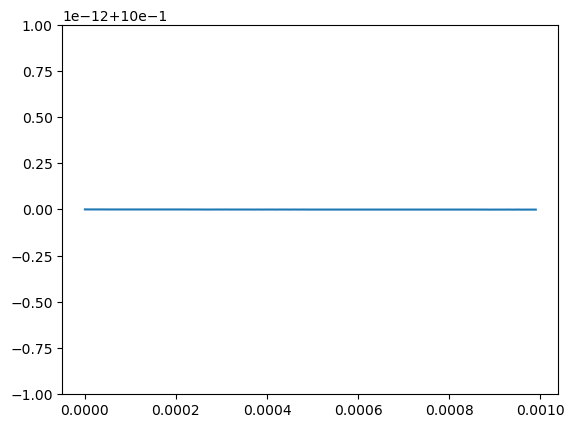

In [16]:
plt.plot(tt, u0)